# Gradient Descents
1.  (Vanilla) GD
2.  Stochastic GD
3.  Momentum based GD (w/ Stochastic)
4.  Nestrov Accelerated GD (w/ Stochastic)
5.  Adagrad
6.  Adagrad + RMSprop   



##  imports and function 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def f1(x, y):
    return np.sin(x) ** 2 + np.cos(y) ** 2

def f1_grad(x, y):
    return np.array([2 * np.cos(x) * np.sin(x), -2 * np.sin(y) * np.cos(y)])

def f2(x, y):
    return (x - 1) ** 2 + (y - 1) ** 2

def f2_grad(x, y):
    return np.array([2 * (x - 1), 2 * (y - 1)])

def f3(x, y):
    return np.exp(-x ** 2 - y ** 2)

def f3_grad(x, y):
    return np.array([-2 * x * np.exp(-x ** 2 - y ** 2), -2 * y * np.exp(-x ** 2 - y ** 2)])

def f4(x, y):
    return 3*(1-x)**2*np.exp(-x**2 - (y+1)**2) - 10*(x/5 - x**3 - y**5)*np.exp(-x**2 - y**2) - 1/3*np.exp(-(x+1)**2 - y**2)

def f4_grad(x, y):
    return np.array([
        6*x*(x-1)*np.exp(-x**2 - (y+1)**2) - 2*(1-x)*np.exp(-x**2 - (y+1)**2) - 2*(2*x/5 - 3*x**2 - y**5)*np.exp(-x**2 - y**2) + 2*x*(10*x/5 - 30*x**2 - 5*y**4)*np.exp(-x**2 - y**2) + 2/3*(x+1)*np.exp(-(x+1)**2 - y**2),
        6*(y+1)*np.exp(-x**2 - (y+1)**2) + 50*y**4*np.exp(-x**2 - y**2) - 2*y*np.exp(-x**2 - y**2)
    ])


In [2]:
import plotly.graph_objects as go

def plot_3d_function(func, x_range = None, y_range = None,width=800, height=800):
    if x_range is None:
        x_range = np.linspace(-5, 5, 100)
    if y_range is None:
        y_range = np.linspace(-5, 5, 100)
    
    X, Y = np.meshgrid(x_range, y_range)
    Z = func(X, Y)

    fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])
    fig.update_layout(title='3D Surface Plot', autosize=False,width=width, height=height,margin=dict(l=65, r=50, b=65, t=90))
    fig.show()

plot_3d_function(f1, np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

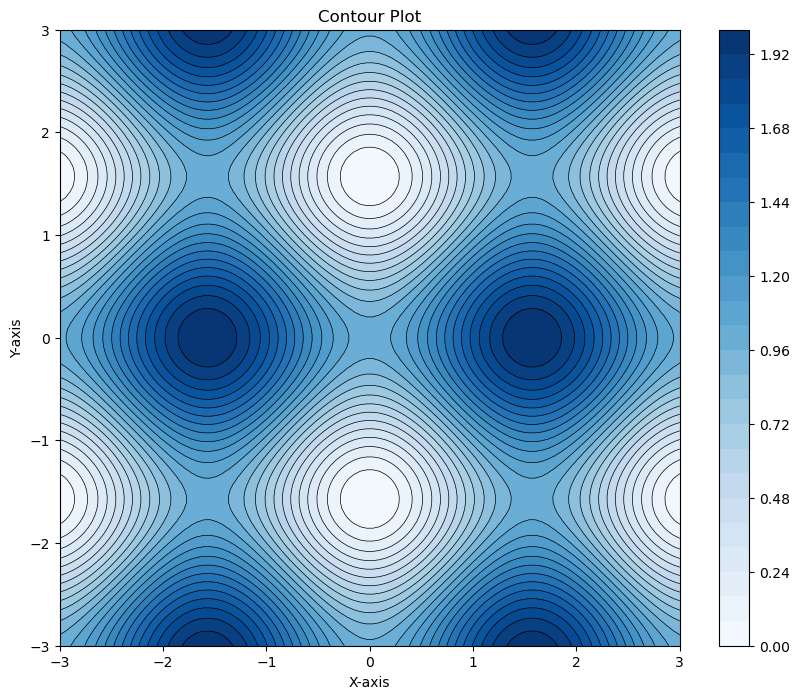

In [3]:
def plot_contour_function(func, x_range=None, y_range=None, levels=25):
    if x_range is None:
        x_range = np.linspace(-5, 5, 100)
    if y_range is None:
        y_range = np.linspace(-5, 5, 100)
    
    X, Y = np.meshgrid(x_range, y_range)
    Z = func(X, Y)

    plt.figure(figsize=(10, 8))
    contour_filled = plt.contourf(X, Y, Z, levels=levels, cmap='Blues')
    contour_lines = plt.contour(X, Y, Z, levels=levels, colors='black', linewidths=0.5)
    plt.colorbar(contour_filled)
    plt.title('Contour Plot')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

plot_contour_function(f1, np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

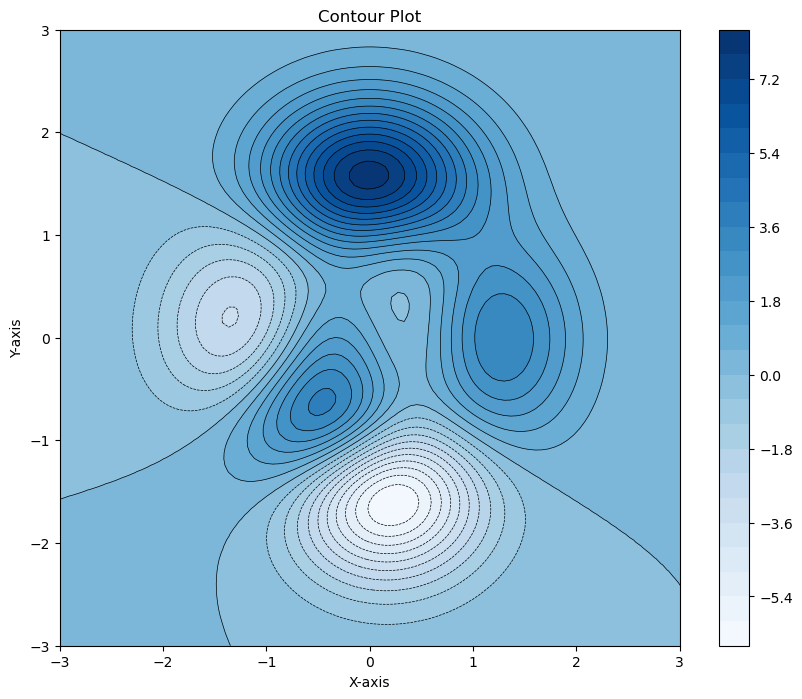

In [4]:
plot_contour_function(f4, np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))


## 1.Vanilla GD

In [5]:
max_iters = 1000
learning_rate = 0.01

def gradient_descent(func, grad, x, y, max_iters, learning_rate):
    x_values = []
    y_values = []
    for i in range(max_iters):
        x_values.append(x)
        y_values.append(y)
        grad_x, grad_y = grad(x, y)
        x -= learning_rate * grad_x
        y -= learning_rate * grad_y
    return x_values, y_values


def plot_gradient_descent(func, x_values, y_values, levels = 25):
    x_range = np.linspace(-3, 3, 100)
    y_range = np.linspace(-3, 3, 100)

    X, Y = np.meshgrid(x_range, y_range)
    Z = func(X, Y)

    plt.figure(figsize=(10, 8))
    contour_filled = plt.contourf(X, Y, Z, levels=levels, cmap='Blues')
    contour_lines = plt.contour(X, Y, Z, levels=levels, colors='black', linewidths=0.5)
    plt.colorbar(contour_filled)
    
    plt.plot(x_values, y_values, 'ro-', markersize=2)
    plt.clabel(contour_lines, inline=True, fontsize=8)
    # inital point
    plt.plot(x_values[0], y_values[0], 'g*', markersize=10, label='Start')
    # final point
    plt.plot(x_values[-1], y_values[-1], 'r*', markersize=10, label='End')
    plt.title('Contour Plot')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()
    

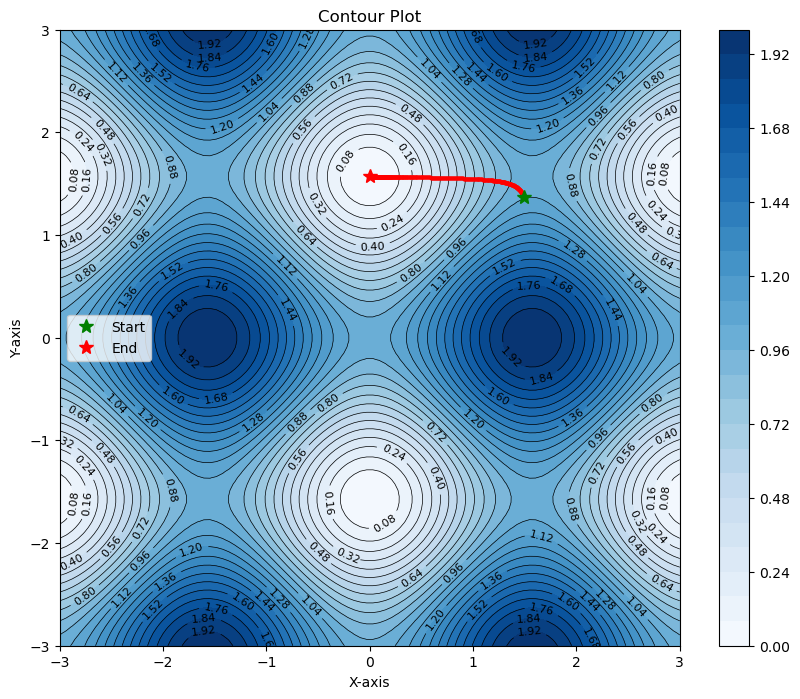

In [6]:
x_init = np.random.uniform(-2, 2)
y_init = np.random.uniform(-2, 2)
x_values, y_values= gradient_descent(f1, f1_grad, x_init, y_init, max_iters, learning_rate = 0.01)
plot_gradient_descent(f1, x_values, y_values)

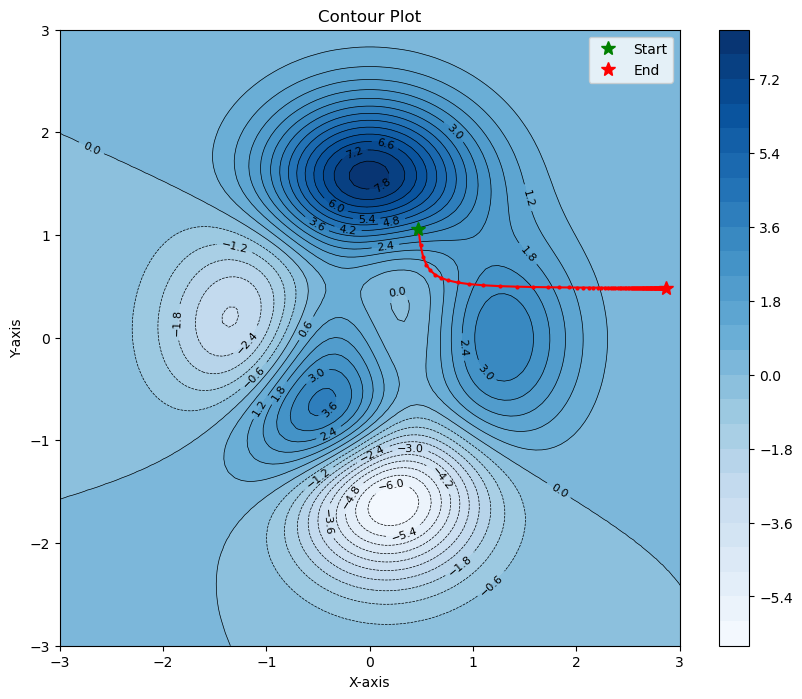

In [7]:
x_init = np.random.uniform(-1, 1)
y_init = np.random.uniform(-1, 2)
x_values, y_values= gradient_descent(f4, f4_grad, x_init, y_init, max_iters = 100, learning_rate= 0.01)
plot_gradient_descent(f4, x_values, y_values)

In [8]:
max_iters = 1000
lr = 0.01


def gradient_descent(func, grad, x, y, max_iters, learning_rate):
    x_values = []
    y_values = []
    for i in range(max_iters):
        x_values.append(x)
        y_values.append(y)
        grad_x, grad_y = grad(x, y)
        x -= learning_rate * grad_x
        y -= learning_rate * grad_y
    return x_values, y_values

x_init = np.random.uniform(-2, 2)
y_init = np.random.uniform(-2, 2)
xv, yv, = gradient_descent(f1, f1_grad, x_init, y_init, max_iters, learning_rate =lr)
res = {'Vanilla GD' : [xv, yv]}

In [9]:
colours_list = sns.color_palette("bright", 12) 
# colours_list

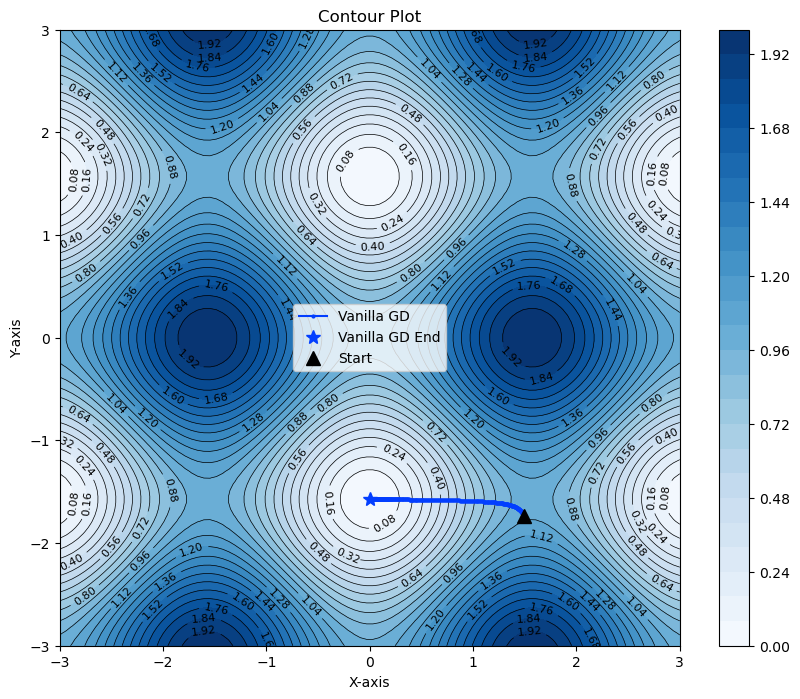

In [10]:

def plot_gradient_descent(func, results , levels = 25, x_range = None, y_range = None):
    if x_range is None:
        x_range = np.linspace(-3, 3, 100)
    if y_range is None:
        y_range = np.linspace(-3, 3, 100)

    X, Y = np.meshgrid(x_range, y_range)
    Z = func(X, Y)

    plt.figure(figsize=(10, 8))
    contour_filled = plt.contourf(X, Y, Z, levels=levels, cmap='Blues')
    contour_lines = plt.contour(X, Y, Z, levels=levels, colors='black', linewidths=0.5)
    plt.colorbar(contour_filled)
    plt.clabel(contour_lines, inline=True, fontsize=8)
    
    for key, value in results.items():
        x_values, y_values = value
        plt.plot(x_values, y_values, 'o-', markersize=2, label=key, color=colours_list[list(results.keys()).index(key)])
        plt.plot(x_values[-1], y_values[-1], '*', markersize=10, label=f'{key} End', color=colours_list[list(results.keys()).index(key)])
        
    plt.plot(x_values[0], y_values[0], '^',color = 'black', markersize=10, label='Start')
    plt.title('Contour Plot')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()

plot_gradient_descent(f1, res)

## 2 Moment Based GD

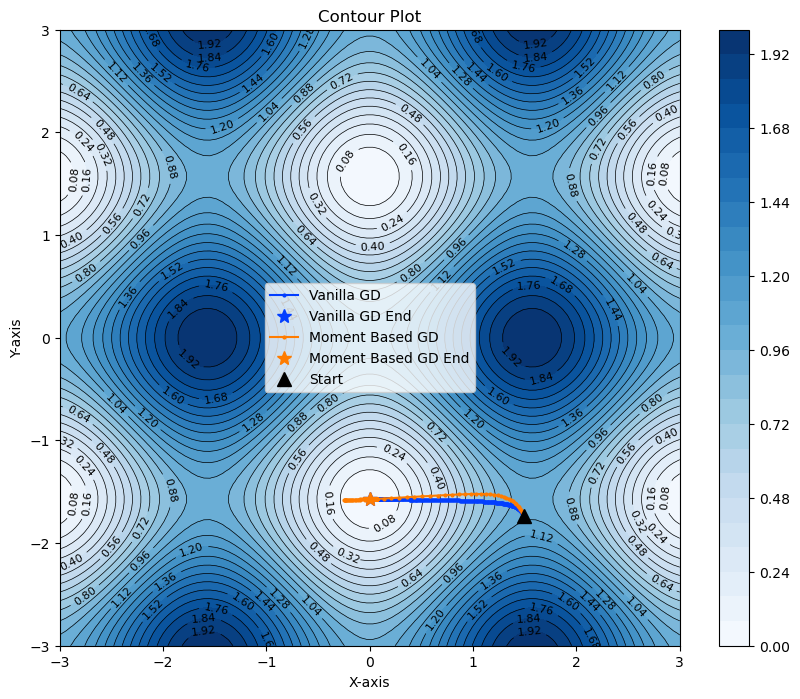

In [11]:
def moment_based_gradient_descent(func, grad, x, y, max_iters, learning_rate, beta = 0.9):
    x_values = []
    y_values = []
    ux = 0 
    uy = 0
    beta = beta 
    for i in range(max_iters):
        x_values.append(x)
        y_values.append(y)
        grad_x, grad_y = grad(x, y)
        ux = beta * ux + grad_x
        uy = beta * uy + grad_y
        x -= learning_rate * ux
        y -= learning_rate * uy
    return x_values, y_values
xv, yv, = moment_based_gradient_descent(f1, f1_grad, x_init, y_init, max_iters, learning_rate =lr)
res['Moment Based GD'] =[xv, yv]
plot_gradient_descent(f1, res)

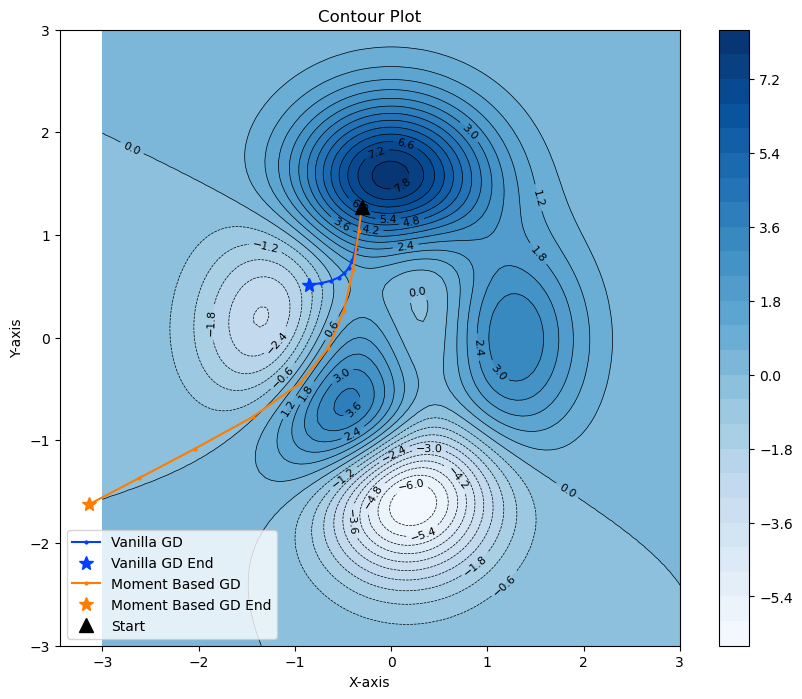

In [12]:
res4 = {}
x_init = np.random.uniform(-3, 2)
y_init = np.random.uniform(-2, 2)
max_iters = 10
xv, yv, = gradient_descent(f4, f4_grad, x_init, y_init, max_iters, learning_rate =lr)
res4['Vanilla GD'] = [xv, yv]
xv , yv = moment_based_gradient_descent(f4, f4_grad, x_init, y_init, max_iters, learning_rate =lr)
res4['Moment Based GD'] = [xv, yv]
plot_gradient_descent(f4, res4)

## 3 nesterov accelerated GD

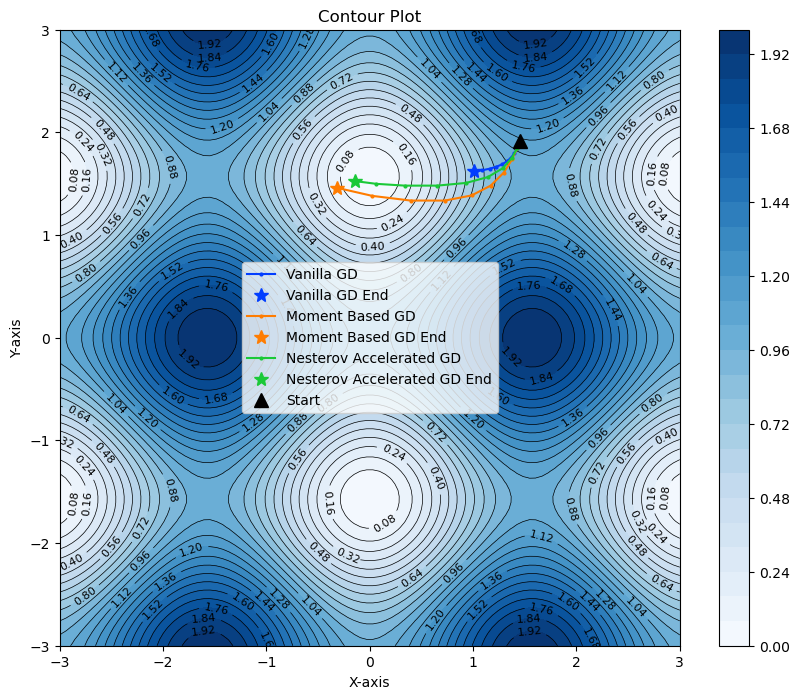

In [13]:
def nesterov_accelerated_gradient_descent(func, grad, x, y, max_iters, learning_rate, beta = 0.85):
    x_values = []
    y_values = []
    ux = 0 
    uy = 0
    beta = beta 
    for i in range(max_iters):
        x_values.append(x)
        y_values.append(y)
        grad_x, grad_y = grad(x - beta * ux, y - beta * uy)
        ux = beta * ux + learning_rate * grad_x
        uy = beta * uy + learning_rate * grad_y
        x -= ux
        y -= uy
    return x_values, y_values
lr = 0.1
x_init = np.random.uniform(-2, 2)
y_init = np.random.uniform(-2, 2)
res['Vanilla GD'] = gradient_descent(f1, f1_grad, x_init, y_init, max_iters, learning_rate =lr)
res['Moment Based GD'] = moment_based_gradient_descent(f1, f1_grad, x_init, y_init, max_iters, learning_rate =lr)
res['Nesterov Accelerated GD'] = nesterov_accelerated_gradient_descent(f1, f1_grad, x_init, y_init, max_iters, learning_rate =lr)
plot_gradient_descent(f1, res)

## 4. Adaptive GD (AdaGRAD)

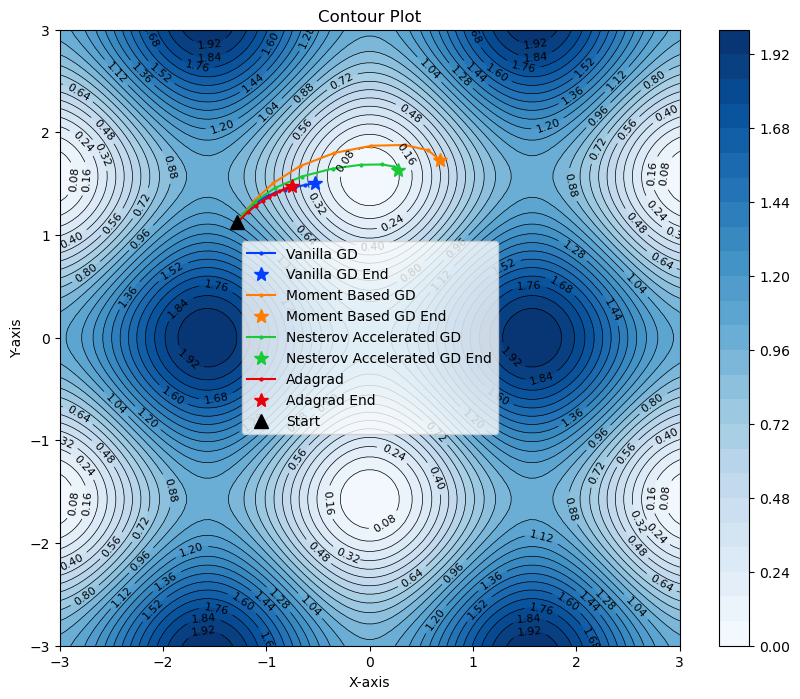

In [14]:
def adagrad(func, grad, x, y, max_iters, learning_rate, beta = 0.85, epsilon = 1e-8):
    x_values = []
    y_values = []
    ux = 0 
    uy = 0
    # beta = beta 
    for i in range(max_iters):
        x_values.append(x)
        y_values.append(y)
        grad_x, grad_y = grad(x, y)
        ux += grad_x**2
        uy += grad_y**2
        x = x - learning_rate / (ux + epsilon)**0.5 * grad_x
        y = y - learning_rate / (uy + epsilon)**0.5 * grad_y
    return x_values, y_values

lr = 0.1
x_init = np.random.uniform(-2, 2)
y_init = np.random.uniform(-2, 2)

res['Vanilla GD'] = gradient_descent(f1, f1_grad, x_init, y_init, max_iters, learning_rate =lr)
res['Moment Based GD'] = moment_based_gradient_descent(f1, f1_grad, x_init, y_init, max_iters, learning_rate =lr)
res['Nesterov Accelerated GD'] = nesterov_accelerated_gradient_descent(f1, f1_grad, x_init, y_init, max_iters, learning_rate =lr)
res['Adagrad'] = adagrad(f1, f1_grad, x_init, y_init, max_iters, learning_rate =lr)

plot_gradient_descent(f1, res)

## 5. RMSprop - Adagrad 

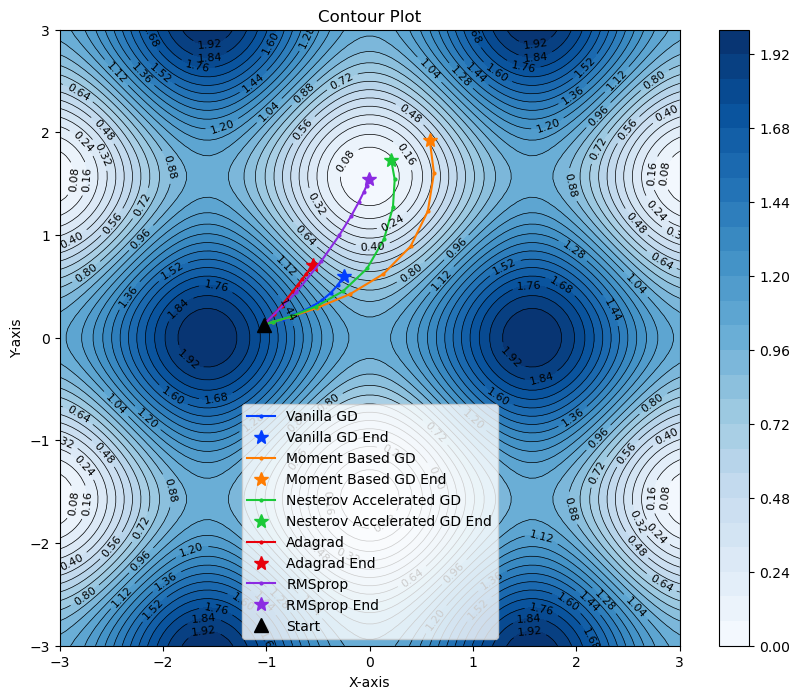

In [15]:
def adagrad_RMSprop(func, grad, x, y, max_iters, learning_rate, beta = 0.85, gamma = 0.9, epsilon = 1e-8):
    x_values = []
    y_values = []
    ux = 0 
    uy = 0
    # beta = beta 
    gamma = gamma
    for i in range(max_iters):
        x_values.append(x)
        y_values.append(y)
        grad_x, grad_y = grad(x, y)
        ux = gamma * ux + (1-gamma)*grad_x**2
        uy = gamma * uy + (1-gamma)*grad_y**2
        x = x - learning_rate / (ux + epsilon)**0.5 * grad_x
        y = y - learning_rate / (uy + epsilon)**0.5 * grad_y
    return x_values, y_values

lr = 0.1
x_init = np.random.uniform(-2,-1 )
y_init = np.random.uniform(-1, 1)

res['Vanilla GD'] = gradient_descent(f1, f1_grad, x_init, y_init, max_iters, learning_rate =lr)
res['Moment Based GD'] = moment_based_gradient_descent(f1, f1_grad, x_init, y_init, max_iters, learning_rate =lr)
res['Nesterov Accelerated GD'] = nesterov_accelerated_gradient_descent(f1, f1_grad, x_init, y_init, max_iters, learning_rate =lr)
res['Adagrad'] = adagrad(f1, f1_grad, x_init, y_init, max_iters, learning_rate =lr)
res['RMSprop'] = adagrad_RMSprop(f1, f1_grad, x_init, y_init, max_iters, learning_rate =lr)

plot_gradient_descent(f1, res)

> Observation: RMSprop oscillating here = sensitive to init learning rate $\eta$

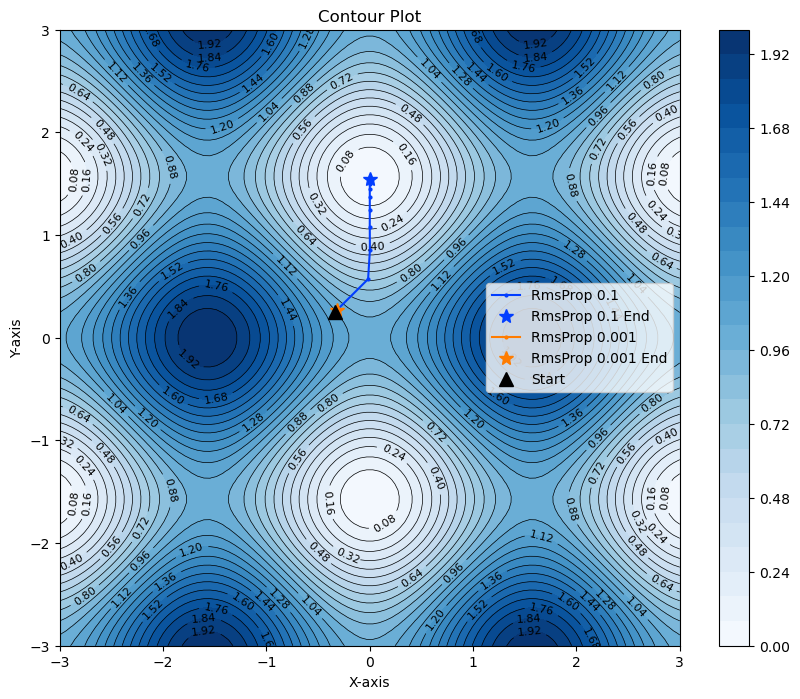

In [16]:
x_init = np.random.uniform(-0.5,0.5)
y_init = np.random.uniform(-0.5, 0.5)
xv , yv = adagrad_RMSprop(f1, f1_grad, x_init, y_init, max_iters, learning_rate = 0.1)
rd= {'RmsProp 0.1' : [xv, yv]}
# xv , yv = adagrad_RMSprop(f1, f1_grad, x_init, y_init, max_iters, learning_rate = 0.3)
# rd['RmsProp 0.3'] = [xv, yv]
# xv , yv = adagrad_RMSprop(f1, f1_grad, x_init, y_init, max_iters, learning_rate = 0.01)
# rd['RmsProp 0.01'] = [xv, yv]
# xv , yv = adagrad_RMSprop(f1, f1_grad, x_init, y_init, max_iters, learning_rate = 0.05)
# rd['RmsProp 0.05'] = [xv, yv]
xv , yv = adagrad_RMSprop(f1, f1_grad, x_init, y_init, max_iters, learning_rate = 0.001)
rd['RmsProp 0.001'] = [xv, yv]
plot_gradient_descent(f1,rd)

## 6. AdaDelta

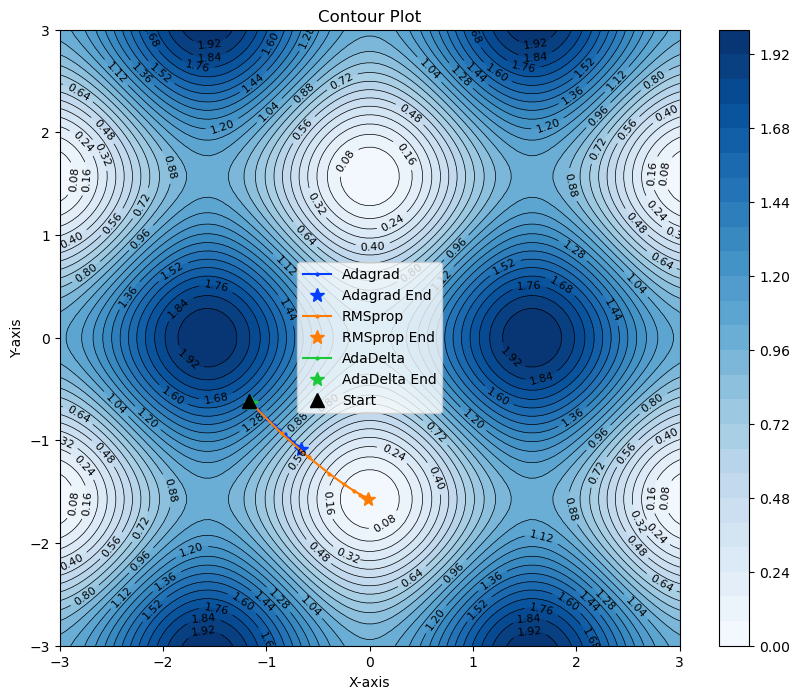

In [17]:
def adadelta(func, grad, x, y, max_iters, beta = 0.85, gamma = 0.75, epsilon = 1e-6):
    x_values = []
    y_values = []
    
    vx = 0 
    vy = 0

    ux = 0
    uy = 0

    # beta = beta 
    gamma = gamma
    for i in range(max_iters):
        x_values.append(x)
        y_values.append(y)
        grad_x, grad_y = grad(x, y)
        vx = gamma * vx + (1-gamma)*grad_x**2
        delta_x = - (ux + epsilon)**0.5 / (vx + epsilon)**0.5 * grad_x
        vy = gamma * vy + (1-gamma)*grad_y**2
        delta_y = - (uy + epsilon)**0.5 / (vy + epsilon)**0.5 * grad_y
        x += delta_x
        y += delta_y
        
        ux = gamma * ux + (1-gamma) * delta_x**2
        uy = gamma * uy + (1-gamma) * delta_y**2
    return x_values, y_values

lr = 0.1
x_init = np.random.uniform(-2,-1 )
y_init = np.random.uniform(-1, 1)
res = {}
# res['Vanilla GD'] = gradient_descent(f1, f1_grad, x_init, y_init, max_iters, learning_rate =lr)
# res['Moment Based GD'] = moment_based_gradient_descent(f1, f1_grad, x_init, y_init, max_iters, learning_rate =lr)
# res['Nesterov Accelerated GD'] = nesterov_accelerated_gradient_descent(f1, f1_grad, x_init, y_init, max_iters, learning_rate =lr)
res['Adagrad'] = adagrad(f1, f1_grad, x_init, y_init, max_iters, learning_rate =lr)
res['RMSprop'] = adagrad_RMSprop(f1, f1_grad, x_init, y_init, max_iters, learning_rate =lr)
res['AdaDelta'] = adadelta(f1, f1_grad, x_init, y_init, max_iters)

plot_gradient_descent(f1, res)

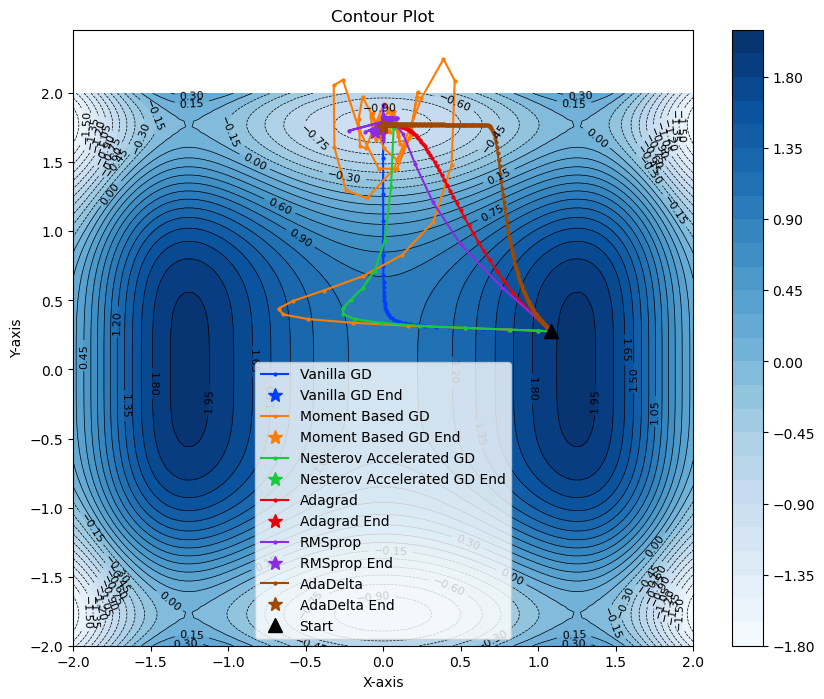

In [28]:
def f5(x, y):
    return np.sin(x**2) + np.cos(y**2)

def f5_grad(x, y):
    return np.array([2 * x * np.cos(x**2), -2 * y * np.sin(y**2)])

lr = 0.1
x_init = np.random.uniform(1, 1.25)
y_init = np.random.uniform(-0.5, 0.5)
res = {}
res['Vanilla GD'] = gradient_descent(f5, f5_grad, x_init, y_init, max_iters, learning_rate =lr)
res['Moment Based GD'] = moment_based_gradient_descent(f5, f5_grad, x_init, y_init, max_iters, learning_rate =lr)
res['Nesterov Accelerated GD'] = nesterov_accelerated_gradient_descent(f5, f5_grad, x_init, y_init, max_iters, learning_rate =lr)
res['Adagrad'] = adagrad(f5, f5_grad, x_init, y_init, max_iters, learning_rate =lr)
res['RMSprop'] = adagrad_RMSprop(f5, f5_grad, x_init, y_init, max_iters, learning_rate =lr)
res['AdaDelta'] = adadelta(f5, f5_grad, x_init, y_init, max_iters)

plot_gradient_descent(f5, res , x_range = np.linspace(-2, 2, 100), y_range = np.linspace(-2, 2, 100))

## 7. Adam

## Different learning Rates

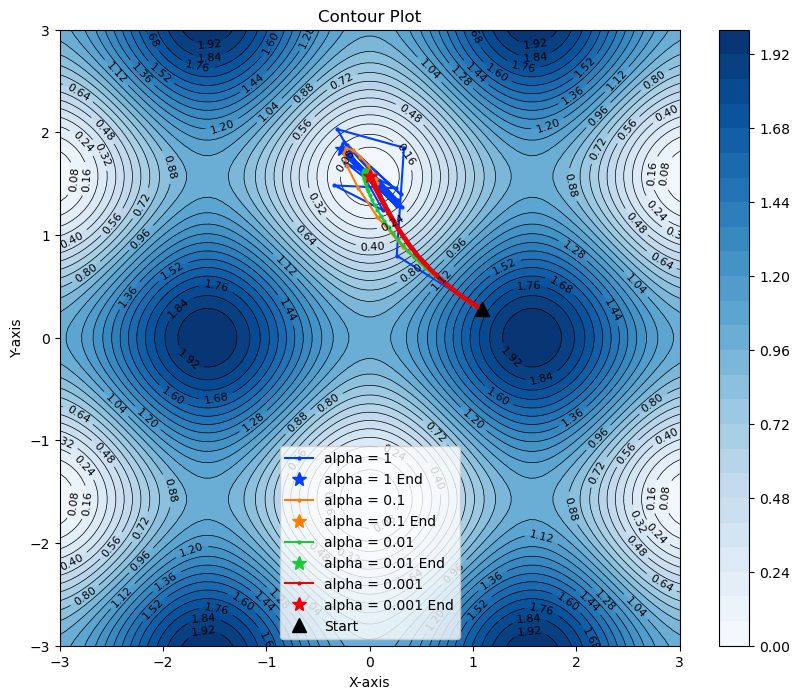

In [31]:
res2 = {}
max_iters = 1000
# res2['alpha = 2'] = nesterov_accelerated_gradient_descent(f1, f1_grad, x_init, y_init, max_iters, learning_rate = 10)
res2['alpha = 1'] = nesterov_accelerated_gradient_descent(f1, f1_grad, x_init, y_init, max_iters, learning_rate = 1)
res2['alpha = 0.1'] = nesterov_accelerated_gradient_descent(f1, f1_grad, x_init, y_init, max_iters, learning_rate = 0.1)
res2['alpha = 0.01'] = nesterov_accelerated_gradient_descent(f1, f1_grad, x_init, y_init, max_iters, learning_rate = 0.01)
res2['alpha = 0.001'] = nesterov_accelerated_gradient_descent(f1, f1_grad, x_init, y_init, max_iters, learning_rate = 0.001)

plot_gradient_descent(f1, res2)